In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

In [2]:
length, mass, std = np.genfromtxt('Means.txt', skip_header = 1).T

In [3]:
(m, b), cov = np.polyfit(length, mass, 1, cov=True)
dm = cov[0, 0]**0.5
db = cov[1, 1]**0.5

In [4]:
m*1e5, dm*1e5

(301.3636363636363, 5.537784774845716)

In [5]:
b*1e3, db*1e3

(-1.2227272727272134, 1.8358403844983853)

In [6]:
rho = 0.988679
V = 0.1

m_ = rho * V
l = (m_ - b) / m

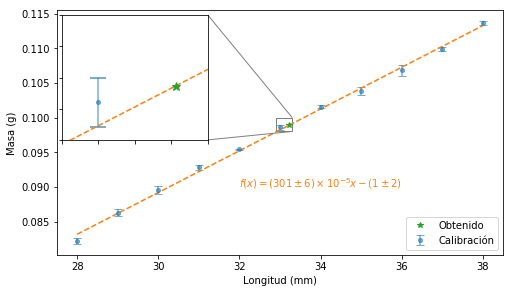

In [8]:
y = m*length + b

fig, ax = plt.subplots(figsize = (8, 4.5))
axins = zoomed_inset_axes(ax, 9, loc = 2) # zoom-factor: 2.5, location: upper-left

ax.errorbar(length, mass, yerr = std, fmt = 'o', capthick = 1, ms = 4, alpha = 0.6, capsize = 4, label = 'Calibración')
c = ax.plot(length, y, '--')[0].get_color()
ax.plot(l, m_, '*', label = 'Obtenido')

axins.errorbar(length, mass, yerr = std, fmt = 'o', capthick = 2, ms = 4, alpha = 0.6, capsize = 8)
axins.plot(length, y, '--')
axins.plot(l, m_, '*', ms = 9)

ax.text(32, 0.09, r'$f(x) = (301 \pm 6)\times 10^{-5}x - (1 \pm 2)$', color = c)

axins.set_xlim(32.9, 33.3) # apply the x-limits
axins.set_ylim(0.098, 0.1) # apply the y-limits

mark_inset(ax, axins, loc1 = 4, loc2 = 1, fc = "none", ec = "0.5")

plt.yticks(visible=False)
plt.xticks(visible=False)

ax.set_xlabel('Longitud (mm)')
ax.set_ylabel('Masa (g)')

ax.legend(loc = 4)

plt.savefig('syringe_cal.png', dpi = 300)
plt.show()